In [71]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [141]:
loan = pd.read_csv(os.getcwd() + '\\data\\train_loanpred.csv')
loan.dropna(axis=0, inplace=True)
loan_target = loan.loc[:, 'Loan_Status'].values
loan.drop(['Loan_ID', 'Loan_Status'], axis=1, inplace=True)
loan.shape

(480, 11)

In [142]:
loan_encode = loan.apply(LabelEncoder().fit_transform)  #multiple cols
loan_encode.head() 
loan_std = StandardScaler().fit_transform(loan_encode)

In [154]:
pca = PCA(n_components=2)
pca.fit(loan_std)
X = pca.transform(loan_std)
loanDf = pd.DataFrame(data = X
             , columns = ['principal component 1', 'principal component 2'])
loantgt = pd.DataFrame(data= loan_target, columns=['Loan_Status'])
loan_final = pd.concat([loanDf, loantgt], axis=1)
loan_final.head()

,principal component 1,principal component 2,Loan_Status
0,0.723221,0.065663,N
1,-0.590865,-0.108527,Y
2,-0.642882,-2.040979,Y
3,-0.574268,1.240545,Y
4,2.913075,0.420702,Y


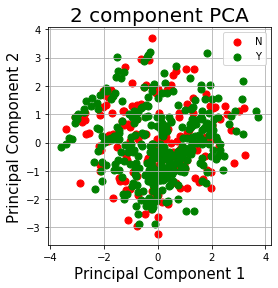

In [156]:
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['N', 'Y']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = loan_final['Loan_Status'] == target
    ax.scatter(loan_final.loc[indicesToKeep, 'principal component 1']
               , loan_final.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [157]:
print("\n% of variance explained by each PC:\n", pca.explained_variance_ratio_)
print("\nAmount of variance explained by each PC, eigen values:\n", pca.explained_variance_)
print("\nEigen vectors\n", pca.components_)
pca.singular_values_


% of variance explained by each PC:
 [0.18210701 0.14286592]

Amount of variance explained by each PC, eigen values:
 [2.00735912 1.57480592]

Eigen vectors
 [[ 0.36822723  0.43170484  0.39173559 -0.13835734  0.17304222  0.37922582
   0.21583909  0.52514024 -0.04920168  0.0079318  -0.08271504]
 [-0.35944603 -0.38742317 -0.1878708  -0.30753324  0.26416702  0.52738555
  -0.28680272  0.28008902  0.24620103  0.04754068 -0.1390297 ]]


array([31.00846689, 27.46510574])

[0.18210701 0.32497293 0.44079778 0.54036921 0.63208646 0.71732241
 0.79563362 0.86600329 0.92908551 0.97722786 1.        ]


Text(0, 0.5, 'Cum Proportion of Variance Explained')

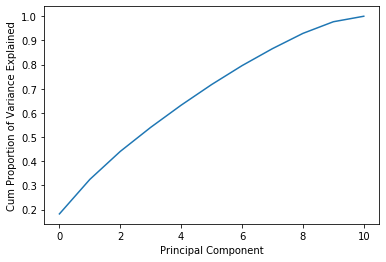

In [80]:
exp_var = np.cumsum(pca.explained_variance_ratio_)
print(exp_var)
plt.plot(exp_var)
plt.xlabel("Principal Component")
plt.ylabel("Cum Proportion of Variance Explained")

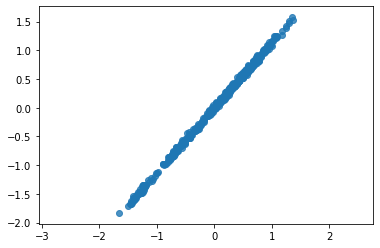

In [185]:
X_new = pca.inverse_transform(X)
#plt.scatter(loan.loc[:, 'Gender'], loan.loc[:, 'LoanAmount'], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');